In [94]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 讀取 CSV 文件
df = pd.read_csv('/Users/ccit0915/Desktop/kaggle/客戶流失預測/WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='utf-8')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


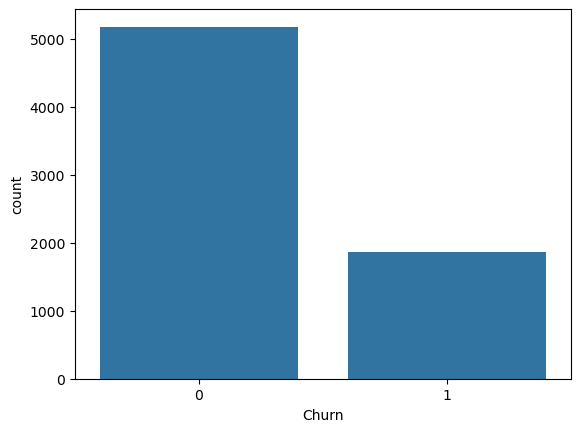

In [95]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
sns.countplot(x='Churn', data=df)
plt.show()

In [98]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.drop(columns=['customerID'], inplace=True)

In [100]:
import pandas as pd

# 需要轉換的二元特徵
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", 
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies"]

# 統一 "No internet service" 為 "No"
df[binary_cols] = df[binary_cols].replace("No internet service", "No")

# **使用 replace() 轉換 Yes/No，顯式使用 astype(int) 來確保數據類型**
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)

# **修正性別轉換**
df["gender"] = df["gender"].map({"Male": 1, "Female": 0}).astype(int)

# **修正 MultipleLines（顯式轉換型別）**
df["MultipleLines"] = df["MultipleLines"].replace(
    {"No": 0, "Yes": 1, "No phone service": 0}
).astype(int)

# **轉換 TotalCharges 為數值，並填補 NaN**
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)
pd.set_option('future.no_silent_downcasting', True)

# 進行 One-Hot Encoding
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# 轉換布林值為整數
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool', 'uint8']).columns})

In [102]:
#pip install scipy

In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 以FS-RFE篩選後的 8個特徵
selected_features_FSRFE = {'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 
                          'InternetService_No', 'Contract_Two year', 'PaymentMethod_Electronic check'}

# 讀取數據
X = df[list(selected_features_FSRFE)]  # FS-RFE篩選後的 8個特徵
y = df['Churn']  # 目標變數

# 切割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model_FSRFE = RandomForestClassifier(n_estimators=100, random_state=42)
model_FSRFE.fit(X_train, y_train)

# 進行預測
y_pred = model_FSRFE.predict(X_test)

# 計算四個評估指標
accuracy_FSRFE = accuracy_score(y_test, y_pred)
precision_FSRFE = precision_score(y_test, y_pred)
recall_FSRFE = recall_score(y_test, y_pred)
f1_FSRFE = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (FS-RFE features) Performance:")
print(f"Accuracy: {accuracy_FSRFE:.4f}")
print(f"Precision: {precision_FSRFE:.4f}")
print(f"Recall: {recall_FSRFE:.4f}")
print(f"F1 Score: {f1_FSRFE:.4f}")

Reduced Model (FS-RFE features) Performance:
Accuracy: 0.7800
Precision: 0.6013
Recall: 0.5013
F1 Score: 0.5468


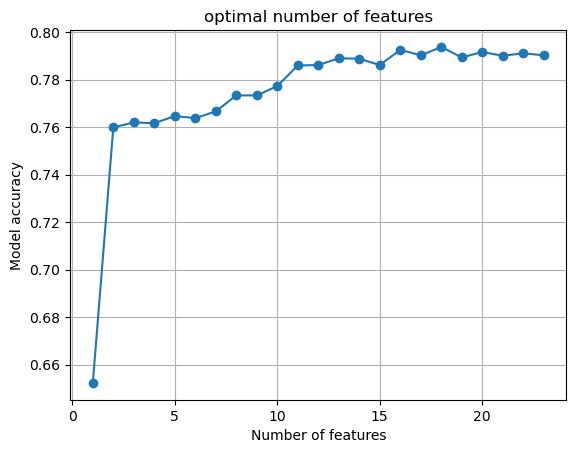

In [74]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

model = RandomForestClassifier()

feature_counts = list(range(1, X_train.shape[1] + 1))
scores = []

# 遍歷不同的特徵數量
for num_features in feature_counts:
    selector = RFE(model, n_features_to_select=num_features)
    X_selected = selector.fit_transform(X_train, y_train)
    
    # 交叉驗證計算準確率
    score = np.mean(cross_val_score(model, X_selected, y_train, cv=5))
    scores.append(score)

# 畫出特徵數 vs. 模型表現曲線
plt.plot(feature_counts, scores, marker='o')
plt.xlabel("Number of features")
plt.ylabel("Model accuracy")
plt.title("optimal number of features")
plt.grid()
plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# FK-RFE 函數：使用隨機森林評估特徵重要性Feature Importance-based Recursive Feature Elimination
def fk_rfe(X, y, k):
    selected_features = list(X.columns)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    while len(selected_features) > k:
        rf.fit(X[selected_features], y)  # 訓練隨機森林模型
        importances = rf.feature_importances_  # 獲取特徵重要性
        
        # 找到最不重要的特徵
        min_importance_index = np.argmin(importances)
        del selected_features[min_importance_index]  # 移除最不重要的特徵
    
    return selected_features

# 讀取數據
X = df.drop(columns=['Churn'])  # 特徵變數
y = df['Churn']  # 目標變數

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 設定想選的特徵數量，例如 8
num_features = 8

# 執行 FK-RFE 選擇特徵
selected_features_fk_rfe = fk_rfe(X_train, y_train, num_features)
print("FK-RFE 選出的特徵:", selected_features_fk_rfe)

# 使用選出的特徵重新訓練 RF 模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train[selected_features_fk_rfe], y_train)

# 計算四個評估指標
accuracy_FKRFE = accuracy_score(y_test, y_pred)
precision_FKRFE = precision_score(y_test, y_pred)
recall_FKRFE = recall_score(y_test, y_pred)
f1_FKRFE = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (FK-RFE features) Performance:")
print(f"Accuracy: {accuracy_FKRFE:.4f}")
print(f"Precision: {precision_FKRFE:.4f}")
print(f"Recall: {recall_FKRFE:.4f}")
print(f"F1 Score: {f1_FKRFE:.4f}")

FK-RFE 選出的特徵: ['gender', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check']
Reduced Model (FK-RFE features) Performance:
Accuracy: 0.7800
Precision: 0.6013
Recall: 0.5013
F1 Score: 0.5468
